In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_file=pd.read_csv(mouse_drug_data_to_load)
trial_file=pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
merge_file=trial_file.merge(mouse_file,on='Mouse ID')

# Display the data table for preview
merge_file.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
grouped_tumor = merge_file[["Drug","Timepoint","Tumor Volume (mm3)"]].groupby(["Drug","Timepoint"]).mean()
# Convert to DataFrame
mean_tumor = pd.DataFrame(grouped_tumor.reset_index())

# Preview DataFrame
mean_tumor.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [9]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
grouped_st_err_tumor = merge_file[['Drug','Timepoint','Tumor Volume (mm3)']].groupby(["Drug","Timepoint"]).sem()
# Convert to DataFrame
#st_err_tumor['Drug','Timepoint','Tumor Volume (mm3)']=grouped_st_err_tumor['Drug','Timepoint','Tumor Volume (mm3)']
#st_err_tumor=grouped_st_err_tumor.drop(['Drug','Timepoint','Tumor Volume (mm3)'],inplace=True)
# Preview DataFrame
st_err_tumor = pd.DataFrame(grouped_st_err_tumor.reset_index())
st_err_tumor.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [12]:
# Minor Data Munging to Re-Format the Data Frames
st_err_tumor.columns=['Drug','Timepoint','Standard Error']
#print(st_err_tumor.columns)
# Preview that Reformatting worked

st_err_tumor.head()

,Drug,Timepoint,Standard Error
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [25]:
#mean_tumor.set_index("Timepoint").transpose()
#mean_tumor.set_index("Timepoint").pivot_table('Drug',['Timepoint','Tumor Volume (mm3)'])
drugs=mean_tumor['Drug'].unique()


array(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol',
       'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype=object)

In [15]:
err_dict={}
for drug in drugs:
    #str(drug)+'_df'=mean_tumor.loc[mean_tumor['Drug']==drug]
    err_dict[drug]=st_err_tumor.loc[st_err_tumor['Drug']==drug]
err_dict[drugs[0]] 

,Drug,Timepoint,Standard Error
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
5,Capomulin,25,0.881642
6,Capomulin,30,0.934460
7,Capomulin,35,1.052241
8,Capomulin,40,1.223608
9,Capomulin,45,1.223977


In [16]:
drug_dict={}
for drug in drugs:
    #str(drug)+'_df'=mean_tumor.loc[mean_tumor['Drug']==drug]
    drug_dict[drug]=mean_tumor.loc[mean_tumor['Drug']==drug]
drug_dict[drugs[0]] 
#drug_df

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


Text(0, 0.5, 'Tumor Volume (mm3)')

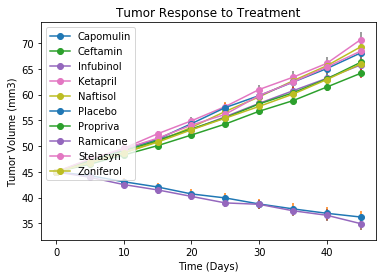

In [21]:
# Generate the Plot (with Error Bars)
x = range(50)
y = range(30,80)
fig = plt.figure()
ax1 = fig.add_subplot(111)


for i in range(len(drugs)):
    x=drug_dict[drugs[i]][['Timepoint']]
    y=drug_dict[drugs[i]][['Tumor Volume (mm3)']]
    ax1.plot(x,y,label=drugs[i],marker='o')
    plt.legend(loc='upper left');
    ax1.errorbar(x.values,y.values,yerr=err_dict[drugs[i]]['Standard Error'],linestyle="None")
    #plt.plot(drug_dict[drugs[i]][['Timepoint']], drug_dict[drugs[i]][['Tumor Volume (mm3)']],'-ok')
# Save the Figure
#ax1.plot
#plt.plot('-ok')

plt.title('Tumor Response to Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume (mm3)')
#plt.errorbar()


In [77]:
# Show the Figure


![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [22]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint  
grouped_met = merge_file[["Drug","Timepoint","Metastatic Sites"]].groupby(["Drug","Timepoint"]).mean()
# Convert to DataFrame
mean_met = pd.DataFrame(grouped_met.reset_index())

# Preview DataFrame
mean_met.head()



,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [23]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
grouped_st_err_met = merge_file[['Drug','Timepoint','Metastatic Sites']].groupby(["Drug","Timepoint"]).sem()
# Convert to DataFrame
st_err_met = pd.DataFrame(grouped_st_err_met.reset_index())
# Preview DataFrame
st_err_met.head()



,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [24]:
# Minor Data Munging to Re-Format the Data Frames
st_err_met.columns=['Drug','Timepoint','Standard Error']

# Preview that Reformatting worked

st_err_met.head()


,Drug,Timepoint,Standard Error
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [26]:
met_err_dict={}
for drug in drugs:
    met_err_dict[drug]=st_err_met.loc[st_err_met['Drug']==drug]
met_err_dict[drugs[0]] 

,Drug,Timepoint,Standard Error
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621
5,Capomulin,25,0.181818
6,Capomulin,30,0.172944
7,Capomulin,35,0.169496
8,Capomulin,40,0.175610
9,Capomulin,45,0.202591


In [28]:
met_drug_dict={}
for drug in drugs:
    met_drug_dict[drug]=mean_met.loc[mean_met['Drug']==drug]
met_drug_dict[drugs[0]] 


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174
5,Capomulin,25,0.818182
6,Capomulin,30,1.090909
7,Capomulin,35,1.181818
8,Capomulin,40,1.380952
9,Capomulin,45,1.476190


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


Text(0, 0.5, 'Metastatic Sites')

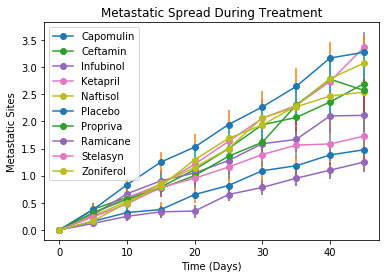

In [37]:
# Generate the Plot (with Error Bars)
x = range(50)
y = range(4)
fig = plt.figure()
ax2 = fig.add_subplot(111)


for i in range(len(drugs)):
    x=met_drug_dict[drugs[i]][['Timepoint']]
    y=met_drug_dict[drugs[i]][['Metastatic Sites']]
    ax2.plot(x,y,label=drugs[i],marker='o')
    plt.legend(loc='upper left');
    ax2.errorbar(x.values,y.values,yerr=met_err_dict[drugs[i]]['Standard Error'],linestyle="None")
    
plt.title('Metastatic Spread During Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Metastatic Sites')

# Save the Figure

# Show the Figure


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [132]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
merge_file['Mouse ID'].value_counts()
 
grouped_mice = merge_file[["Drug","Timepoint",'Mouse ID']].groupby(["Drug","Timepoint"]).count()

# Convert to DataFrame
mice = pd.DataFrame(grouped_mice.reset_index())
#mice_index = pd.DataFrame(grouped_mice)
# Preview DataFrame
mice.head()


,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [128]:
#mouse_start_dict={}
#for i in range(len(drugs)):
    #mouse_array2.append(mice.loc[mice['Timepoint']==0,['Drug','Mouse ID']])
#mouse_start_dict=mice_noindex.loc[mice_noindex['Timepoint']==0,'Mouse ID']
#for index,row in mice.iterrows():
    #if mice['Timepoint']==0:
        #mouse_start_dict.update({"Drug":mice['Drug'],"Mouse Count":mice['Mouse ID']})
#print(mouse_start_dict)
#max_mice_df=pd.DataFrame()
max_mice=pd.DataFrame(mice[mice['Timepoint']==0])
#max_mice_df=max_mice['Drug', 'Mouse ID']
#max_mice_df.to_dict()
max_mice_list=max_mice['Mouse ID'].tolist()
max_mice_list
#mice.head()

[25, 25, 25, 25, 25, 25, 26, 25, 26, 25]

In [165]:
#mouse_percent={}
#drugs_list=list(drugs)
for drug in drugs:
    #max_df=pd.DataFrame(max_mice.loc[mice['Drug']==drug,'Mouse ID'])
    #max_df.append([max_df]*9,ignore_index=True)
    #print(max_mice_list[list(drugs).index(drug)])
    mice['Percent']=mice["Mouse ID"]/max_mice_list[list(drugs).index(drug)]
    #mouse_percent[drug]/max_mice_list[list(drugs).index(drug)]
    #mouse_percent[drug].append(mice.loc[mice['Drug']==drug,'Mouse ID']/max_mice_list[list(drugs).index(drug)])
        
mice


,Drug,Timepoint,Mouse ID,Percent
0,Capomulin,0,25,1.00
1,Capomulin,5,25,1.00
2,Capomulin,10,25,1.00
3,Capomulin,15,24,0.96
4,Capomulin,20,23,0.92
5,Capomulin,25,22,0.88
6,Capomulin,30,22,0.88
7,Capomulin,35,22,0.88
8,Capomulin,40,21,0.84
9,Capomulin,45,21,0.84


In [166]:
# Minor Data Munging to Re-Format the Data Frames
mouse_dict={}
for drug in drugs:
    mouse_dict[drug]=mice.loc[mice['Drug']==drug]
    #mouse_dict[drug].append(mouse_percent)
#mouse_dict[drugs[0]]
mouse_dict[drugs[0]]
# Preview the Data Frame


,Drug,Timepoint,Mouse ID,Percent
0,Capomulin,0,25,1.00
1,Capomulin,5,25,1.00
2,Capomulin,10,25,1.00
3,Capomulin,15,24,0.96
4,Capomulin,20,23,0.92
5,Capomulin,25,22,0.88
6,Capomulin,30,22,0.88
7,Capomulin,35,22,0.88
8,Capomulin,40,21,0.84
9,Capomulin,45,21,0.84


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


Text(0, 0.5, 'Mouse Count')

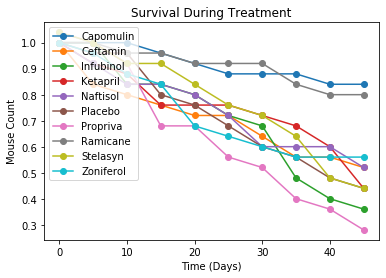

In [167]:
# Generate the Plot (Accounting for percentages)
x = range(50)
y = range(100)
fig = plt.figure()
ax3 = fig.add_subplot(111)


for i in range(len(drugs)):
    x=mouse_dict[drugs[i]][['Timepoint']]
    y=mouse_dict[drugs[i]][['Percent']]
    ax3.plot(x,y,label=drugs[i],marker='o')
    plt.legend(loc='upper left');
    #ax3.errorbar(x.values,y.values,yerr=met_err_dict[drugs[i]]['Standard Error'],linestyle="None")
    
plt.title('Survival During Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Mouse Count')
# Save the Figure

# Show the Figure
#plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [172]:
# Calculate the percent changes for each drug
drug_change=pd.DataFrame(mean_tumor[mean_tumor['Timepoint']==45])

#drug_change_list=drug_change['Tumor Volume (mm3)'].tolist()
drug_change
# Display the data to confirm


,Drug,Timepoint,Tumor Volume (mm3)
9,Capomulin,45,36.236114
19,Ceftamin,45,64.132421
29,Infubinol,45,65.755562
39,Ketapril,45,70.662958
49,Naftisol,45,69.265506
59,Placebo,45,68.084082
69,Propriva,45,66.258529
79,Ramicane,45,34.955595
89,Stelasyn,45,68.438310
99,Zoniferol,45,65.960888


In [178]:
for drug in drugs:
    #max_df=pd.DataFrame(max_mice.loc[mice['Drug']==drug,'Mouse ID'])
    #max_df.append([max_df]*9,ignore_index=True)
    #print(max_mice_list[list(drugs).index(drug)])
    drug_change['Change']=drug_change['Tumor Volume (mm3)']/45*100-100
drug_change.head()

,Drug,Timepoint,Tumor Volume (mm3),Change
9,Capomulin,45,36.236114,-19.475303
19,Ceftamin,45,64.132421,42.516492
29,Infubinol,45,65.755562,46.123472
39,Ketapril,45,70.662958,57.028795
49,Naftisol,45,69.265506,53.923347


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

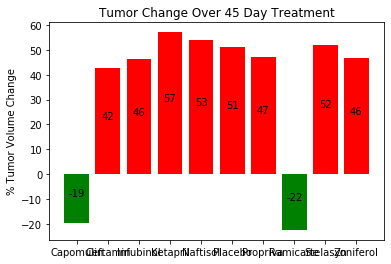

In [190]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs
values=drug_change['Change']

# Orient widths. Add labels, tick marks, etc.
clrs = ['green' if (y < 0) else 'red' for y in values ]
rects=plt.bar(drug_change['Drug'], values, width=0.8, color=clrs)
#plt.bar(drug_change['Drug'], drug_change['Change'], width=0.8,color=['green'])

# Use functions to label the percentages of changes
plt.title('Tumor Change Over 45 Day Treatment')
plt.ylabel('% Tumor Volume Change')

# Call functions to implement the function calls
def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., .5*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects)


# Save the Figure


# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)